In [93]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization, Activation, Dropout
from keras.optimizers import Adam
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
from keras.models import load_model

import warnings
warnings.filterwarnings('ignore')

In [12]:
train_dir = r'train/'
test_dir = r'validation/'

In [13]:
target_var = os.listdir(train_dir)
target_var

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

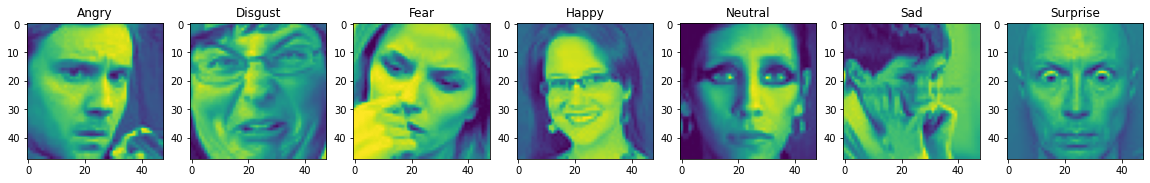

In [16]:
fig, axes = plt.subplots(1, 7, figsize=(20,8))
for i in range(len(target_var)):
    temp = train_dir + target_var[i] +'/' + os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(temp) )
    axes[i].set_title(target_var[i])
plt.show()

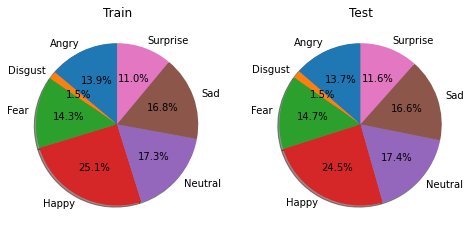

Emotion : Angry
	Training : 3995
	 Testing : 491
Emotion : Disgust
	Training : 436
	 Testing : 55
Emotion : Fear
	Training : 4097
	 Testing : 528
Emotion : Happy
	Training : 7215
	 Testing : 879
Emotion : Neutral
	Training : 4965
	 Testing : 626
Emotion : Sad
	Training : 4830
	 Testing : 594
Emotion : Surprise
	Training : 3171
	 Testing : 416


In [17]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = ([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var
fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))

In [37]:
train_idg = ImageDataGenerator(rescale=1./255, validation_split=0.3) # 30 percent validation split for taining 
test_idg = ImageDataGenerator(rescale=1./255)
img_size = (48, 48)
batch_size = 64

arg_train = {'target_size': img_size,
             'color_mode': 'grayscale',
             'class_mode' : 'categorical',
             'batch_size': batch_size}
arg_test = {'target_size': img_size,
            'color_mode': 'grayscale',
            'class_mode' : 'categorical',
            'batch_size': batch_size,
            'shuffle': False}

train = train_idg.flow_from_directory(directory=train_dir, subset='training', **arg_train)
valid = train_idg.flow_from_directory(directory=train_dir, subset='validation', **arg_train)
test  = test_idg.flow_from_directory(directory=test_dir, **arg_test)

Found 20099 images belonging to 7 classes.
Found 8610 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [38]:
model = Sequential()

In [39]:
model.add(Conv2D(32, (3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(7,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 24, 24, 32)       

In [41]:
model.compile(optimizer=Adam(lr=0.0005),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(
    train ,
    validation_data=valid,
    epochs=50)

Epoch 1/50
315/315 [==============================] - 155s 491ms/step - loss: 2.5821 - accuracy: 0.1870 - val_loss: 1.9143 - val_accuracy: 0.2200
Epoch 2/50
315/315 [==============================] - 160s 507ms/step - loss: 2.0747 - accuracy: 0.2484 - val_loss: 1.7305 - val_accuracy: 0.3204
Epoch 3/50
315/315 [==============================] - 171s 544ms/step - loss: 1.8481 - accuracy: 0.3022 - val_loss: 1.5972 - val_accuracy: 0.3876
Epoch 4/50
315/315 [==============================] - 171s 543ms/step - loss: 1.7355 - accuracy: 0.3292 - val_loss: 1.5523 - val_accuracy: 0.3927
Epoch 5/50
315/315 [==============================] - 174s 553ms/step - loss: 1.6263 - accuracy: 0.3685 - val_loss: 1.4924 - val_accuracy: 0.4220
Epoch 6/50
315/315 [==============================] - 172s 545ms/step - loss: 1.6063 - accuracy: 0.3743 - val_loss: 1.4765 - val_accuracy: 0.4266
Epoch 7/50
315/315 [==============================] - 173s 548ms/step - loss: 1.5359 - accuracy: 0.4061 - val_loss: 1.4352 -

In [61]:
model.save("emotions_prediction.h5")

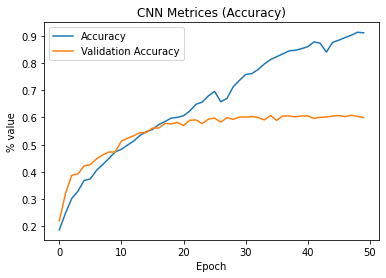

In [42]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Metrices (Accuracy)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

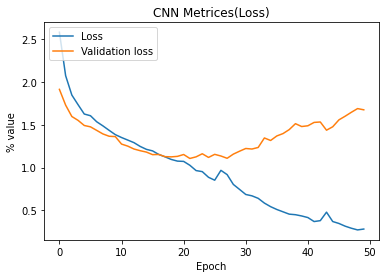

In [44]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('CNN Metrices(Loss)')
plt.ylabel('% value')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

In [45]:
y_pred = model.predict(test)

In [46]:
y_pred_labels = []
for i in y_pred:
    y_pred_labels.append(np.argmax(i))

In [47]:
y_actual = test.classes[test.index_array]

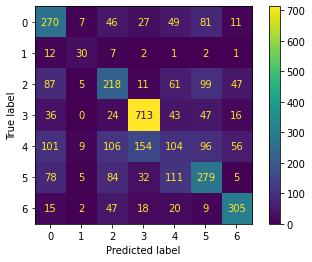

In [49]:
cm = metrics.confusion_matrix(y_actual, y_pred_labels)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [51]:
print(classification_report(y_actual, y_pred_labels, digits=4))

              precision    recall  f1-score   support

           0     0.4508    0.5499    0.4954       491
           1     0.5172    0.5455    0.5310        55
           2     0.4098    0.4129    0.4113       528
           3     0.7450    0.8111    0.7767       879
           4     0.2674    0.1661    0.2049       626
           5     0.4551    0.4697    0.4623       594
           6     0.6916    0.7332    0.7118       416

    accuracy                         0.5347      3589
   macro avg     0.5053    0.5269    0.5133      3589
weighted avg     0.5145    0.5347    0.5214      3589

